# Meteorite Landings

### DESCRIPTION
All of the known meteorite landings <br>
*Got this dataset from data.world (https://data.world/nasa/meteorite-landings)*

### Overview
Shooting stars, or meteors, are bits of interplanetary material falling through Earth's atmosphere and heated to incandescence by friction. These objects are called meteoroids as they are hurtling through space, becoming meteors for the few seconds they streak across the sky and create glowing trails.

Scientists estimate that 44 tonnes (44,000 kilograms, about 48.5 tons) of meteoritic material falls on the Earth each day. Several meteors per hour can usually be seen on any given night. Sometimes the number increases dramatically - these events are termed meteor showers. Some occur annually or at regular intervals as the Earth passes through the trail of dusty debris left by a comet. Meteor showers are usually named after a star or constellation that is close to where the meteors appear in the sky. Perhaps the most famous are the Perseids, which peak around 12 August every year. Every Perseid meteor is a tiny piece of the comet Swift-Tuttle, which swings by the Sun every 135 years. Other meteor showers and their associated comets are the Leonids (Tempel-Tuttle), the Aquarids and Orionids (Halley), and the Taurids (Encke). Most comet dust in meteor showers burns up in the atmosphere before reaching the ground; some dust is captured by high-altitude aircraft and analyzed in NASA laboratories.

#### Notes
This comprehensive data set is from The Meteoritical Society.

nametype: `'valid'` is for most meteorites and `'relict'` are for objects that were once meteorites but are now highly altered by weathering on Earth.

### Sources:
* https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh
* http://solarsystem.nasa.gov/planets/meteors/indepth

### Tools used:
* `urllib` - (Downloading the dataset)
* `numpy` - (Mathematical calulations)
* `pandas` - (Data analysis / manipulation)
* `matplotlib` - (Data Visualization)
* `seaborn` - (Data Visualization)


I have learned a lot from Data Analysis with Python: Zero to Pandas course.
Thank you `Aakash N S` sir,
The way of teaching was really good, and moreover the course was also in (Hindi) which really helped me.

## Downloading the Dataset

### Meteorite Landing
Here, we will be downloading the dataset using `urllib` library, using the download link provided bt `Data.world`

In [46]:
from urllib.request import urlretrieve

Let's begin by downloading the data, and listing the files within the dataset.

In [47]:
import os

if os.path.exists("meteorite.csv"):
    print("CSV file exists")
else:
    meteorite_url = "https://query.data.world/s/62mjgv3upv6ormsh7yarfgskeqvyfu?dws=00000"
    urlretrieve(meteorite_url, 'meteorite.csv')

CSV file exists


The dataset has been downloaded and extracted.

In [48]:
data_dir = './'

In [49]:
import os
os.listdir(data_dir) # here we can see meteorite.csv which is our downloaded DataSet

['.ipynb_checkpoints',
 '.jovianrc',
 'environment-linux.yml',
 'environment-macos.yml',
 'environment.yml',
 'meteorite.csv',
 'zerotopandas-course-project.ipynb']

Let us save and upload our work to Jovian before continuing.

In [50]:
project_name = "meteorite-landing-project"

In [52]:
# !pip install jovian --upgrade -q

In [53]:
import jovian

In [54]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'

## Data Preparation and Cleaning

Let's prepare and clean our dataset, This will include:

> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


#### Loading dataset using pandas

In [55]:
import pandas as pd

In [56]:
meteorite_db = pd.read_csv("meteorite.csv")

In [57]:
meteorite_db

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)"


In [58]:
meteorite_db.shape  # 45716 rows and 10 columns

(45716, 10)

#### Observations till now:
* Our dataset has 45716 rows and 10 columns.
The dataset contains the following variables:

> - `name`: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
> - `id`: a unique identifier for the meteorite
> - `nametype`: one of:
-- `valid`: a typical meteorite
-- `relict`: a meteorite that has been highly degraded by weather on Earth
> - `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
> - `mass`: the mass of the meteorite, in grams
> - `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of:
-- `Fell`: the meteorite's fall was observed
-- `Found`: the meteorite's fall was not observed
> - `year`: the year the meteorite fell, or the year it was found (depending on the value of fell)
> - `reclat`: the latitude of the meteorite's landing
> - `reclong`: the longitude of the meteorite's landing
> - `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines reclat and reclong


#### Creating a Schema

In [59]:
meteorite_sh = {
    "name": "the name of the meteorite (typically a location, often modified with a number, year, composition, etc)",
    "id": "a unique identifier for the meteorite",
    "nametype": "one of: -- valid: a typical meteorite -- relict: a meteorite that has been highly degraded by weather on Earth",
    "recclass": "the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)",
    "mass": "the mass of the meteorite, in grams",
    "fall": "whether the meteorite was seen falling, or was discovered after its impact; one of: -- Fell: the meteorite's fall was observed -- Found: the meteorite's fall was not observed",
    "year": "the year the meteorite fell, or the year it was found (depending on the value of fell)",
    "reclat": "the latitude of the meteorite's landing",
    "reclong": "the longitude of the meteorite's landing",
    "GeoLocation": "a parentheses-enclose, comma-separated tuple that combines reclat and reclong",
}

In [60]:
meteorite_sh["year"] # Now we can use our dataset variables as keys to get its values (Description) like this

'the year the meteorite fell, or the year it was found (depending on the value of fell)'

In [61]:
meteorite_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


#### Cleaning the dataset
Here, we can observe that our dataset has 45716 entries, but we have some missing entries for `mass`, `fall`, `year`, `reclat`, `reclong` and `Geolocation`. And there is one more issue; it is with year column, it is of object datatype and has this kind of format `01/01/1880 12:00:00 AM`, but in this column i simply want year only with datatype int64.
So, 
1. We will simply remove those rows with missing entries as the number of missing entries is really small as compared to recorded entries.
2. We will write a function extract_year_from_date to extract only year from year column

In [62]:
meteorite_db.sample(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
11146,Elephant Moraine 92147,9549,Valid,CR2,1.50,Found,01/01/1992 12:00:00 AM,-76.02632,156.04138,"(-76.026320, 156.041380)"
18823,LaPaz Icefield 04695,45243,Valid,L5,7.40,Found,01/01/2004 12:00:00 AM,NaN,NaN,NaN
8552,Dominion Range 08107,53936,Valid,LL6,16.90,Found,01/01/2008 12:00:00 AM,0.00000,0.00000,"(0.000000, 0.000000)"
38961,Yamato 74543,24921,Valid,H6,16.47,Found,01/01/1974 12:00:00 AM,0.00000,35.66667,"(0.000000, 35.666670)"
21293,Lewis Cliff 88581,14321,Valid,H5,9.20,Found,01/01/1988 12:00:00 AM,-84.24660,161.40761,"(-84.246600, 161.407610)"
24884,Miller Range 07511,53236,Valid,LL6,7.20,Found,01/01/2007 12:00:00 AM,0.00000,0.00000,"(0.000000, 0.000000)"
261,Dundrum,7745,Valid,H5,2270.00,Fell,01/01/1865 12:00:00 AM,52.55000,-8.03333,"(52.550000, -8.033330)"
44294,Yamato 981905,38527,Valid,H6,12.49,Found,01/01/1998 12:00:00 AM,0.00000,0.00000,"(0.000000, 0.000000)"
25476,Miller Range 090402,54970,Valid,L6,85.30,Found,01/01/2009 12:00:00 AM,0.00000,0.00000,"(0.000000, 0.000000)"
29755,Northwest Africa 6196,51786,Valid,LL6,247.00,Found,01/01/2009 12:00:00 AM,0.00000,0.00000,"(0.000000, 0.000000)"


In [63]:
meteorite_db.dropna(inplace=True) # Dropping rows with missing entries

In [64]:
meteorite_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38116 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38116 non-null  object 
 1   id           38116 non-null  int64  
 2   nametype     38116 non-null  object 
 3   recclass     38116 non-null  object 
 4   mass (g)     38116 non-null  float64
 5   fall         38116 non-null  object 
 6   year         38116 non-null  object 
 7   reclat       38116 non-null  float64
 8   reclong      38116 non-null  float64
 9   GeoLocation  38116 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.2+ MB


*So, our Dataset is somewhat cleaned now it has `38116` columns with no missing entries in it.* <br>
Let's handle the year column now...

In [65]:
# Function to extract year
def extract_year_from_date(date_string):
    date_parts = date_string.split(' ')[0].split('/')
    year = int(date_parts[2])
    return year

In [66]:
# Iterate over each row in the meteorite.year
years = []
for row in meteorite_db.year:
    if isinstance(row, str):
        year = extract_year_from_date(row)
        years.append(year)
        
if len(years) != 0:  # Check if list if empty (in case where we have already extracted the years)
    meteorite_db['year'] = years
else:
    print("Already extracted...")

**Finally, Our Dataset is cleaned and ready for Explorations...**

In [67]:
meteorite_db

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.789170, 41.504600)"


In [68]:
meteorite_db.year.min()  # We only want data above year 1600

601

In [69]:
meteorite_db.year.max()  # We only want data below year 2023

2101

### Removing invalid years

In [70]:
meteorite_db = meteorite_db[(meteorite_db['year'] >= 1600) & (meteorite_db['year'] <= 2023)]

In [73]:
meteorite_db.year.min() # Minimum 1600

1600

In [74]:
meteorite_db.year.max() # Maximum 2013

2013

In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [77]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Meteorite Classification Distribution

L6                7518
H5                6243
H6                3898
H4                3880
L5                3264
                  ... 
H4(?)                1
Relict iron          1
EL4/5                1
L5-7                 1
Mesosiderite-C       1
Name: recclass, Length: 422, dtype: int64


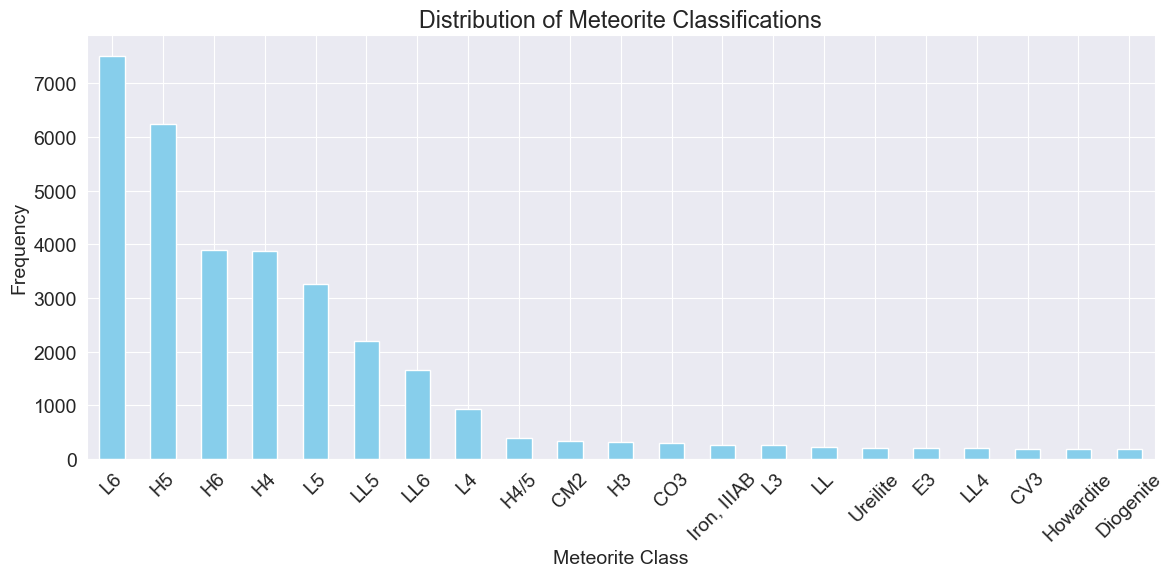

In [78]:
# Calculate the frequency of each meteorite class
class_counts = meteorite_db['recclass'].value_counts()
print(class_counts)

# Filter out less frequent classes
min_frequency = 170  # We can adjust this threshhold
class_counts_filtered = class_counts[class_counts >= min_frequency]

# Create a bar plot
plt.figure(figsize=(12, 6))
class_counts_filtered.plot(kind='bar', color='skyblue');

plt.xlabel('Meteorite Class')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Classifications')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

#### Pie plot for the same

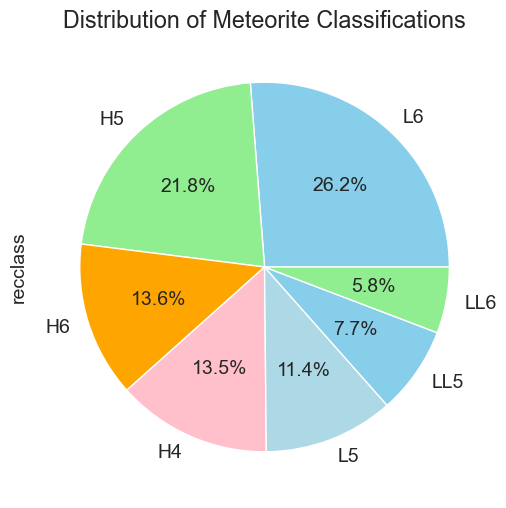

In [79]:
# Filter out less frequent classes
min_frequency = 1000  # We can adjust this threshhold
class_counts_filtered = class_counts[class_counts >= min_frequency]

# Create a pie chart
plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue'])

plt.title('Distribution of Meteorite Classifications')
plt.show()

Based on these standings, you can infer that `L6` meteorites are the most frequently observed in the dataset, followed by `H5` and then `H6` meteorites. This information provides insights into the relative abundance or representation of different meteorite classifications in the dataset.

### Meteorite Falls vs. Finds

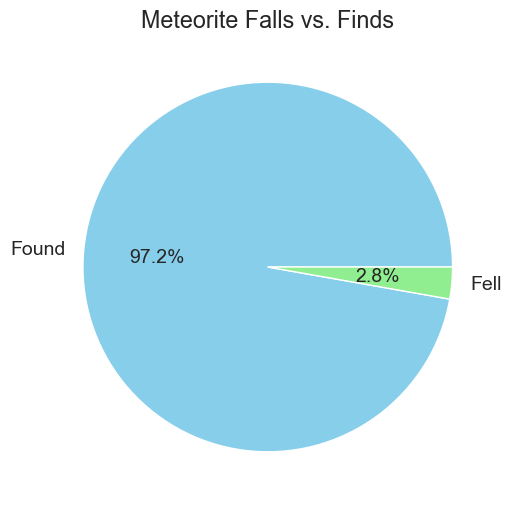

In [80]:
# Calculate the count of meteorite falls and finds
fall_counts = meteorite_db['fall'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 6))
plt.pie(fall_counts.values, labels=fall_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])

plt.title('Meteorite Falls vs. Finds')
plt.show()

The high percentage of `"Found"` meteorites `(97.2%)` suggests that a significant portion of meteorites in the dataset were discovered through deliberate search efforts or chance encounters, rather than being witnessed during a `fall` event. This indicates that meteorites are more commonly found rather than directly observed falling from the sky.

### Meteorite Mass Distribution

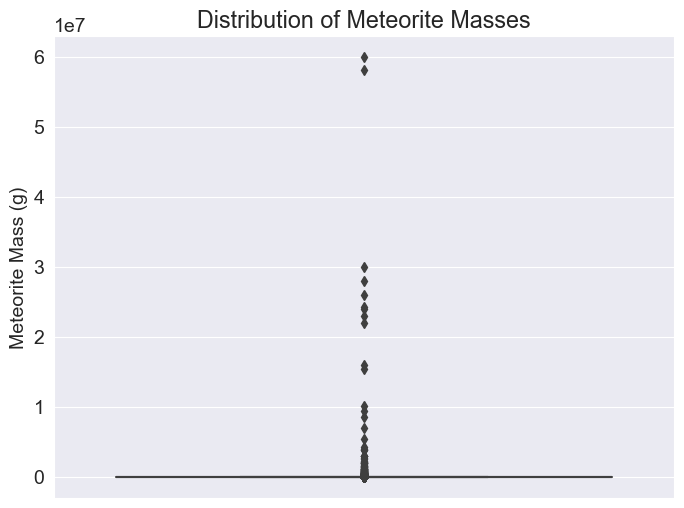

In [81]:
# Box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=meteorite_db, y='mass (g)')
plt.ylabel('Meteorite Mass (g)')
plt.title('Distribution of Meteorite Masses')
plt.show()

Here, we can observe that most of the meteorite found were less in mass nearly around `(0 to 1e4)`

### Meteorite (Valid / Relict)

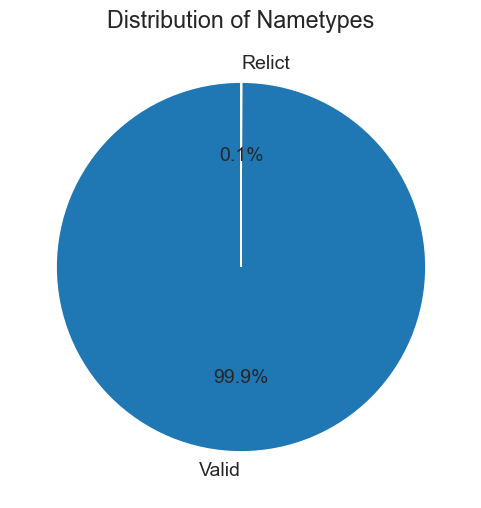

In [82]:
# Count the occurrences of each nametype
nametype_counts = meteorite_db['nametype'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(nametype_counts, labels=nametype_counts.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Nametypes')

# Show the plot
plt.show()

Here, we can see that, Most of the `Meteorites` are still `Intact` and has not decayed.

### Geographic Distribution of Meteorite Falls
* Here we will be using cartopy, it is a python library mostly used to create interactive plots, such as `map` plot
* Can be installed using ```pip insall cartopy```

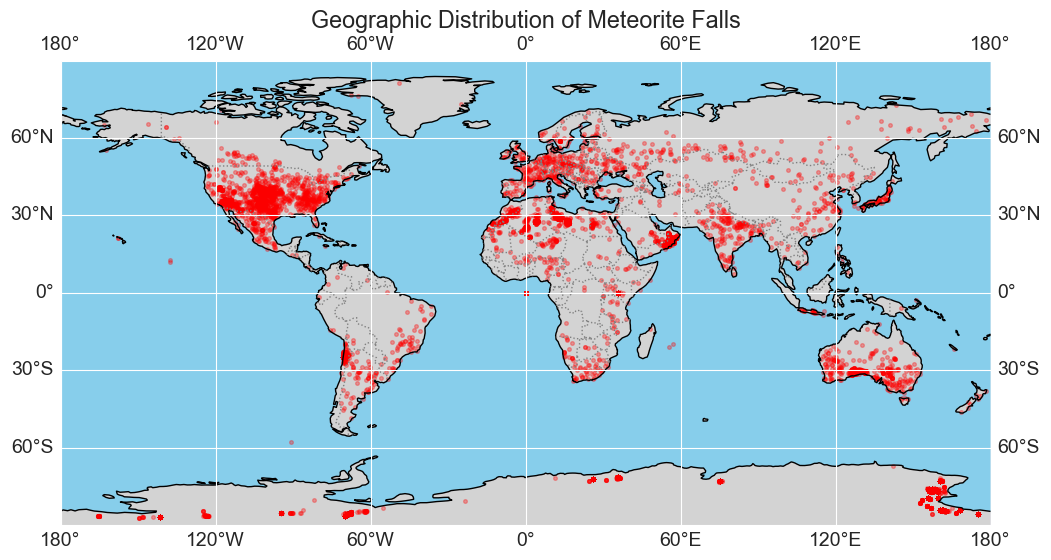

In [83]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a scatter plot with Cartopy
plt.figure(figsize=(12, 8))

# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the scatter points
ax.scatter(meteorite_db['reclong'], meteorite_db['reclat'], s=7, c='red', alpha=0.3, transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='skyblue')
ax.gridlines(draw_labels=True)

# Set plot title
plt.title('Geographic Distribution of Meteorite Falls')

# Show the plot
plt.show()

Here, We can observe that `USA` has the most amount of meteorite fall / found

Let us save and upload our work to Jovian before continuing

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'

## Asking and Answering Questions


#### Q1: What is the distribution of meteorite falls and finds?

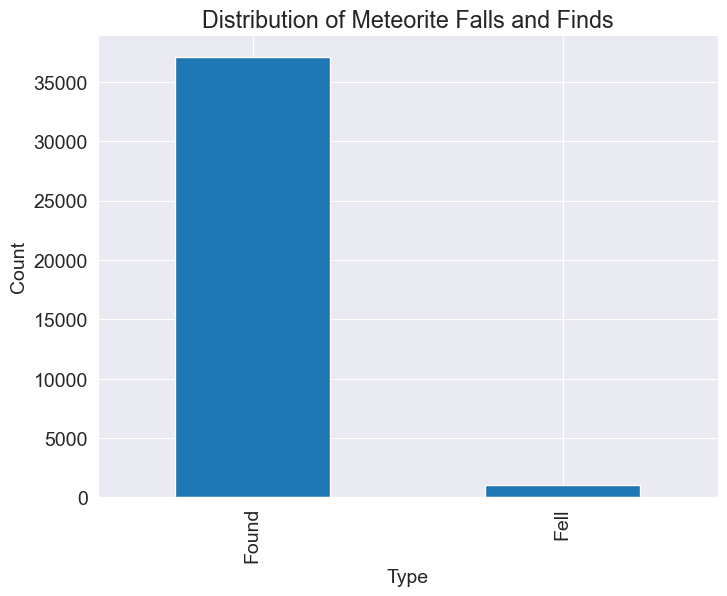

In [86]:
# Create a count plot
plt.figure(figsize=(8, 6))
meteorite_db['fall'].value_counts().plot(kind='bar')

# Set plot title and labels
plt.title('Distribution of Meteorite Falls and Finds')
plt.xlabel('Type')
plt.ylabel('Count')

# Show the plot
plt.show()

The high percentage of `"Found"` meteorites suggests that a significant portion of meteorites in the dataset were discovered through deliberate search efforts or chance encounters, rather than being witnessed during a `fall` event. This indicates that meteorites are more commonly found rather than directly observed falling from the sky.

#### Q2: What is the correlation between the mass of meteorites and their geographical location?

In [87]:
# Select the relevant columns
data = meteorite_db[['mass (g)', 'reclat', 'reclong']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

          mass (g)    reclat   reclong
mass (g)  1.000000  0.031401 -0.020477
reclat    0.031401  1.000000 -0.593295
reclong  -0.020477 -0.593295  1.000000


> - Mass (g) and reclat (Latitude): The correlation coefficient between mass (g) and reclat is 0.031401. This indicates a very weak positive correlation between the mass of meteorites and their latitude. In other words, there is a very minimal tendency for the mass of meteorites to increase or decrease as the latitude changes.

> - Mass (g) and reclong (Longitude): The correlation coefficient between mass (g) and reclong is -0.020477. This indicates a very weak negative correlation between the mass of meteorites and their longitude. Again, there is a minimal tendency for the mass of meteorites to be influenced by changes in longitude.

> - reclat (Latitude) and reclong (Longitude): The correlation coefficient between reclat and reclong is -0.593295. This indicates a moderate negative correlation between the latitude and longitude of meteorite locations. It suggests that as the latitude increases, the longitude tends to decrease, and vice versa. This could be an indication of the geographical distribution patterns of meteorite falls.

#### Q3: Which meteorite classification has the highest average mass?

In [88]:
# Group by 'recclass' and calculate the mean of 'mass (g)'
mean_mass_by_class = meteorite_db.groupby('recclass')['mass (g)'].mean()

In [89]:
# Find the classification with the highest average mass
max_avg_mass_class = mean_mass_by_class.idxmax()
max_avg_mass = mean_mass_by_class[max_avg_mass_class]

In [90]:
# Print the result
print(f"The meteorite classification with the highest average mass is {max_avg_mass_class} with an average mass of {max_avg_mass:.2f} grams.")

The meteorite classification with the highest average mass is Iron, IVB with an average mass of 4322832.86 grams.


The `"Iron, IVB"` classification represents a specific type of iron meteorite. Iron meteorites are primarily composed of `iron` and `nickel`, and they often exhibit `high densities` and `larger masses` compared to other meteorite types. The high average mass of "Iron, IVB" suggests that these meteorites tend to have a substantial `size` and `weight`.

#### Q4: How does the number of meteorite falls and finds vary over the years?

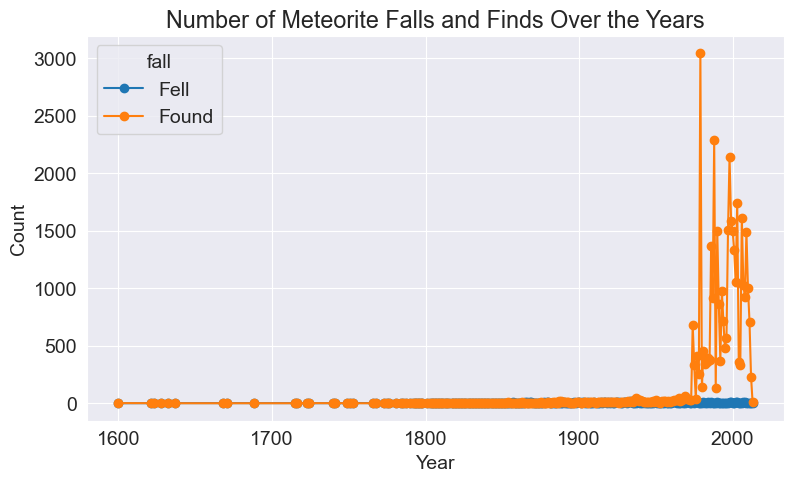

In [91]:
# Group by 'year' and count the occurrences of 'Fell' and 'Found'
fall_vs_find = meteorite_db.groupby('year')['fall'].value_counts().unstack().fillna(0)

# Plot the number of meteorite falls and finds over the years
fall_vs_find.plot(kind='line', marker='o')

# Set the plot title and labels
plt.title("Number of Meteorite Falls and Finds Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")

# Display the plot
plt.show()

We can observe that most of the meteorite `fall` / `found` data is from the years between `1970 - 2013`, This is probably because we have found those meteorites in those particluar years. We didn't have much data earlier.

#### Q5: Which country has the most amout of meteorite fall / found ?

From the above analysis, We can observe that `USA` has the most amount of meteorite fall / found followed by `Japan`.

In [92]:
import jovian

In [93]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'

## Inferences and Conclusion

**Meteorite Falls vs. Finds**: The dataset contains a higher number of meteorite finds compared to meteorite falls. This suggests that a significant portion of the recorded meteorites are discovered through scientific expeditions, research, or public contributions rather than witnessing a fall event.

**Geographic Distribution**: The scatter plot or map plot of meteorite locations reveals the global distribution of meteorite falls. It indicates that meteorites have been found in various regions across the world, and their distribution is not limited to specific geographic areas.

**Classification type: Iron, IVB has highest avg mass**: The "Iron, IVB" classification represents a specific type of iron meteorite. Iron meteorites are primarily composed of iron and nickel, and they often exhibit high densities and larger masses compared to other meteorite types. The high average mass of "Iron, IVB" suggests that these meteorites tend to have a substantial size and weight.


In [94]:
import jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'

## References and Future Work

**SOME BLOG LINKS WHICH HELPED ME IN FINDING INTERESTING AND FUN DATASETS** <br>
>- **Links** <br>
`Interesting` DataSets: https://piktochart.com/blog/data-sets <br>
`Fun` DataSets: https://www.springboard.com/blog/data-science/15-fun-datasets-to-analyze/

> - **Numpy**: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
This intro of numpy at W3 Schools has really helped me: https://www.w3schools.com/python/numpy/numpy_intro.asp <br>
O'Reilly numpy practice colab notebook: https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_numpy.ipynb

> - **Pandas**: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. <br>
This Colab Notebook by author of `Hands on Machine Learning` O'Reilly's book is a very good source to begin with pandas till advance pandas: https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_pandas.ipynb 

> - **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. <br>
O'Reilly matplotlib colab notebook: https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_matplotlib.ipynb

> - **Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
It's official documentation is quite good: https://seaborn.pydata.org/



>- **Cartopy**: Cartopy is a Python package designed to make drawing maps for data analysis and visualisation easy. It features: object oriented projection definitions. point, line, polygon and image transformations between projections. integration to expose advanced mapping in Matplotlib with a simple and intuitive interface.
Introduction to cartopy: https://scitools.org.uk/cartopy/docs/latest/

*I found this **(Cartopy)** python package really helpful, for `Future Work`, I am going to work more on this library, to plot more interactive plots, and try to find more inferences from them.*

**FUTURE WORK**

I initially started with `Machine Learning`, from a course on `Coursera` by `Andrew Ng`, That course have 3 parts (I have completed its supervised machine learning part), but was having some trouble in implementing the code by myself. <br>
So, I wanted to learn basics first, such as `numpy`, `pandas` and `Matplotlib`, and them I stubbled upon this course, The whole course was really good, along with practical implementations, which really helped me.

So, now for `Future Work` I will be moving forward to Analyze and Clean the data and train some Machine Learning models on it, to predict some useful informations.
Now, I will be able to continue with that Machine Learning course. (Thanks to `zerotopandas`...)

The resources which I'm following is:
> - Course: https://www.coursera.org/specializations/machine-learning-introduction (Machine Learning Specialization by `Andrew Ng`)
> - Book: https://amzn.eu/d/81AowSw (Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by `O'Reilly`)
> - Colab Notebook: https://colab.research.google.com/github/ageron/handson-ml3/blob/main/index.ipynb (Complete `Machine Learning`)

In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wasif1607/meteorite-landing-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/wasif1607/meteorite-landing-project


'https://jovian.com/wasif1607/meteorite-landing-project'